# NumPy: cамостоятельные упражнения

Этот ноутбук является переводом раздела [Some exercises](https://scipy-lectures.org/intro/numpy/exercises.html) из онлайн-курса [scipy-lectures](https://scipy-lectures.org/)

Данные из ноутбука могут быть скачаны из [репозитория GitHub](https://github.com/hairymax/Python-for-science-lecture-notes/tree/main/2.%20NumPy) 

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

## 1. Работа с массивами

1. Сформируйте двухмерный массив (не заполняя его явно): 
```
[[1, 6, 11],
 [2, 7, 12],
 [3, 8, 13],
 [4, 9, 14],
 [5, 10, 15]]
```
и созрайте новый массив, содержаший вторую и четвёртую строки.

2. Разделите каждый столбец массива:
```
a = np.arange(25).reshape(5, 5)
```
поэлементно на массив `b = np.array([1., 5, 10, 15, 20])`. *Подсказка*: используйте `np.newaxis`)

3. Посложнее: Создайте массив 10 на 3 из случайных чисел (в диапазоне [0, 1]). Для каждой строки, выберите число, близжайшее к 0.5.
  * Используйте `abs` и `argsort`, чтобы найти столбец j, близжайший для каждой строки.
  * Используйте индексацию по маске, чтобы вывести числа. (Подсказка: `a[i,j]` - массив i должен содержать номера строк, соответствующие элементам j.)

## 2. Работа с изображениями

Давайте сделаем некоторые манипуляции на массивах numpy, начав с изображения енота. В `scipy` можно молучить двухмерный массив этого изображения через функцию `scipy.misc.face`:
``` python
from scipy import misc
face = misc.face(gray=True)     # двумерное изображение
```

Ниже приведены несколько примерных результатов выполнения задания.  
Преобразуйте изображение: 
- используйте различные карты цветов (`colormap`)
- обрежьте изображение
- измените некоторые части изображения.

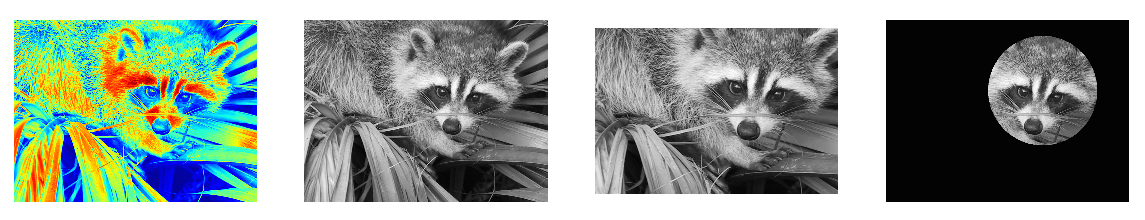

* Воспользуйтесь функцией `imshow` пакета `matplotlib`, чтобы отобразить изображение.

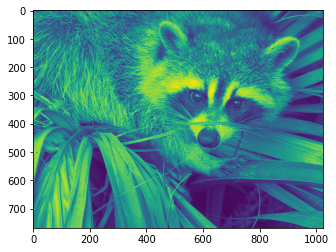

In [2]:
face = misc.face(gray=True)
plt.imshow(face);

* Лицо изображено в неправильном цвете. Карта цвета должна быть настроена для отображения в тонах серого.

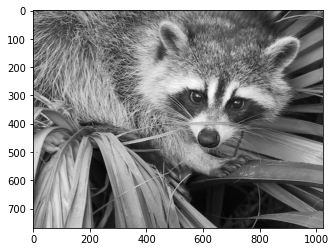

In [3]:
plt.imshow(face, cmap=plt.cm.gray);

* Создайте массив изображения с более узким центрированием: например, уберите по 100 пикселей со всех границ изображения. Чтобы проверить результат, изобразите новый массив с помощью `imshow`.

In [4]:
crop_face = face[100:-100, 100:-100]

* Теперь мы обрамим лицо чёрным фоном. Для этого нам нужно создать маску, соответствующую пикселям, которые мы хотим сделать чёрными. Центр изображения расположен около (660, 330), так что мы определяем маску таким условием `(y-300)**2 + (x-660)**2`

In [5]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx]   # x и y - индексы пикселей
y.shape, x.shape

((768, 1), (1, 1024))

In [6]:
centerx, centery = (660, 300)   # центр изображения
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2   # круг

- после этого мы присваиваем значение `0` пикселям, соответствующим маске. Синтаксис предельно прост и интуитивен:

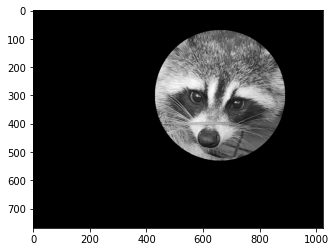

In [7]:
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray);

* Далее: 
  - скопируйте все инструнции в скрипт с именем `face_locket.py`, после чего исполните скрипт в IPython с помощью `%run face_locket.py`
  - Измените круг на элипсоид.


## 3. Статистическая обработка данных

Данные в [`populations.txt`](https://scipy-lectures.org/_downloads/populations.txt) описывают численность зайцев, рысей и моркови в северной Канаде на протяжении 20-и лет:

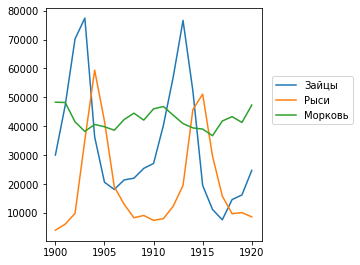

In [9]:
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T # трюк: столбцы как переменные

plt.axes([0.2, 0.1, 0.5, 0.81])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Зайцы', 'Рыси', 'Морковь'), loc=(1.05, 0.5));

Вычислите и выведите на экран, основываясь на данных в `populations.txt`...
1. Среднее значение и стандартное отклонение популяции каждого вида за годы предствленного временного периода.
2. В каком году каждый из видов вид достигал максимальной популяции.
3. Чья популяция - наибольшая в каждом году. (*Подсказка*: используйте `argsort` и индексацию по маске массива `np.array(['H', 'L', 'C'])`)
4. В каком году какая либо из популяций больше 5000. (Подсказка: используйте сравнения и `np.any`)
5. Топ-2 лет, в которых у видов была наименьшая популяция. (Подсказка: используйте `argsort`, индексация по маске)
6. Сравните (на графике) изменение в популяции зайцев (см. `help(np.gradient)`) и числа рысей. Проверьте корреляцию этих величин (см. `help(np.corrcoef)`).

...и всё это без циклов for!

## 4. Приближённые вычисления интегралов

Запишите функцию `f(a, b, c)`, которая возвращает $a^b-c$.  
Сформируйте массив 24 на 12 на 6, содержащий его значения в диапазоне изменения параметров `[0,1] x [0,1] x [0,1]`.

Вычислите приближенное значение трёхмерного интеграла
$$\int_0^1 \int_0^1 \int_0^1 (a^b-c) \phantom{.} da \phantom{.} db \phantom{.} dc$$
по этому объёму со средним значение. Точный результат: 
$$\ln2-\frac12\approx0.1931\dots$$ 
какова ваша относительная ошибка?

*Подсказки*: используйте поэлементные операции и трансляции. Вы можете сделать так, чтобы `np.ogrid` показывало число точек в заданном диапазоне с помощью `np.ogrid[0:1:20j]`.)

*Напоминание*. Функции в Python:
``` python
def f(a, b, c):
  return какой_то_результат
```

## 5. Множество Мандельброта

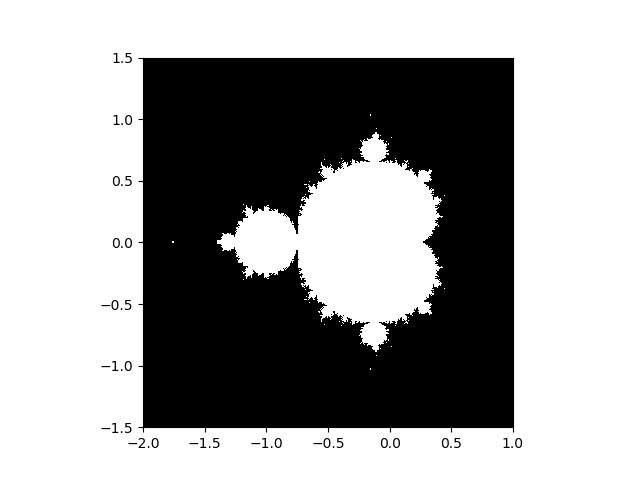

Напишите скрипт, который вычисляет фрактал Мандельброта.  
Код для итерации Мандельброта:
``` python
N_max = 50
some_threshold = 50
c = x + 1j*y
z = 0
for j in range(N_max):
  z = z**2 + c
```

Точка (x, y) принадлежит множеству Мандельброта, если $|z| < \text{some_threshold}$  
Реализуйте это вычисление следующим образом:
1. Постройте сетку из значений `c = x + 1j*y` в диапазоне `[-2, 1] x [-1.5, 1.5]`
2. Выполните итерацию.
3. Сформируйте двухмерную логическую маску, показывающую, относятся ли точки к множеству
4. Сохраните реузльтат как изображение с помощью:

``` python
import matplotlib.pyplot as plt
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.savefig('mandelbrot.png')
```

## 6. Цепь Маркова

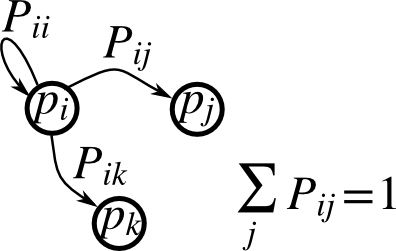

Матрица переходов цепи Маркова `P` и распределение вероятностей состояний `p`:
1. `0 <= P[i,j] <= 1`: вероятность перехода из состояния `i` в состояние `j`
2. Правило перехода: $ p_{\text{новое}} = P^T p_{\text{старое}} $
3. `all(sum(P, axis=1) == 1), p.sum() == 1`: нормализация

Напишите скрипт, который работает с тремя состояниями и:
* Строит случайную матрицу и нормализует каждую строку так, что получается матрица перехода.
* Начинает со случайного (нормализованного) распределения вероятностей p и делает 50 шагов => `p_50`
* Вычисляет стационарное распределение: собственный вектор `P.T` с собственным значением 1 (численно: близжайший к 1) => `p_stationary`

Не забудьте нормализовать собственный вектор!
* Проверьте, равны ли `p_50` и `p_stationary` с допустимым отклонением 1e-5

Инструменты: `np.random.rand`, `.dot()`, `np.linalg.eig`, сокращения, `abs()`, `argmin`, сравнения, `all`, `np.linalg.norm`, и т. д.